In [1]:
#% matplotlib notebook
import skspatial
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import numpy as np

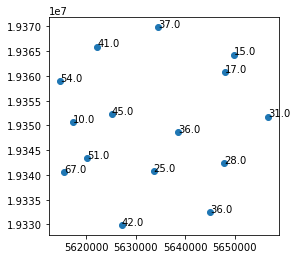

In [2]:
gdf = gpd.read_file(os.path.join('data','inputs_pts.shp'))

gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]
gdf.plot()
for idx, row in gdf.iterrows():
    plt.annotate(s=row['z'], xy=row['coords'],
                 horizontalalignment='left')

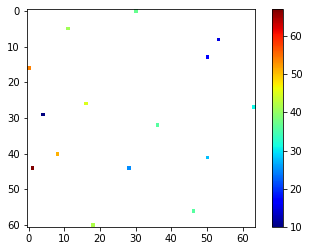

In [3]:
res = 5280/8 # 8th of a mile grid size
ml = skspatial.interp2d(gdf,'z',res=res)

hgrid = ml.points_to_grid()
fig, ax = plt.subplots()
plt.imshow(hgrid,cmap='jet')
plt.colorbar()

In [4]:
## Using knn
array = ml.knn_2D(k=5,weights='distance')

Text(0.5, 1, 'KNN')

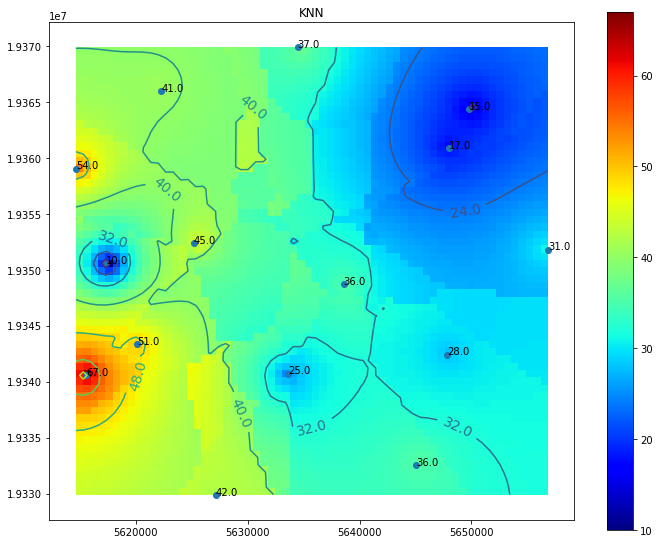

In [5]:
ax = ml.plot_image(array,'z value\n')
gdf.plot(ax=ax)
for idx, row in gdf.iterrows():
    plt.annotate(s=row['z'], xy=row['coords'],
                 horizontalalignment='left')
CS = plt.contour(np.flipud(array),extent=ml.extent)
plt.clabel(CS, inline=1,
           fmt='%1.1f',
           fontsize=14)
ax.set_title('KNN')

In [6]:
path = os.path.join('data','output.tif')
ml.write_raster(array,path)

In [7]:
## Now lets use scipy
array = ml.interpolate_2D(method='linear')

Text(0.5, 1, 'linear')

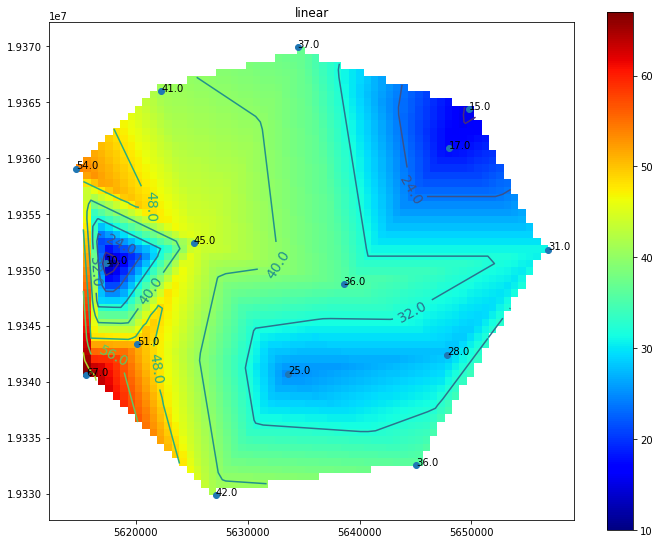

In [8]:
ax = ml.plot_image(array,'z value\n')
gdf.plot(ax=ax)
for idx, row in gdf.iterrows():
    plt.annotate(s=row['z'], xy=row['coords'],
                 horizontalalignment='left')
CS = plt.contour(np.flipud(array),extent=ml.extent)
plt.clabel(CS, inline=1,
           fmt='%1.1f',
           fontsize=14)
ax.set_title('linear')

In [9]:
# the major con here is that currently scipy's interpolate function does not extrapolate, 
# so all values outside of the convex hull are left nan

In [10]:
## Now lets use pykrige
array = ml.OrdinaryKriging_2D()

Text(0.5, 1, 'krige')

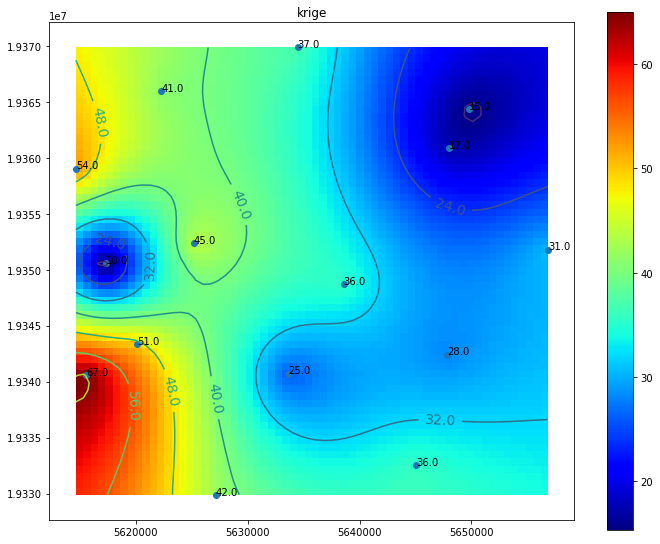

In [13]:
ax = ml.plot_image(array,'z value\n')
# fig, ax = plt.subplots(figsize=(8*2,6*2))
# plt.imshow(array,cmap='jet')
# plt.colorbar()
gdf.plot(ax=ax)
for idx, row in gdf.iterrows():
    plt.annotate(s=row['z'], xy=row['coords'],
                 horizontalalignment='left')
CS = plt.contour(np.flipud(array),extent=ml.extent)
plt.clabel(CS, inline=1,
           fmt='%1.1f',
           fontsize=14)
ax.set_title('krige')